<a href="https://colab.research.google.com/github/pvtarun/TSA-EXPERIMENTS/blob/main/tsa_ex_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

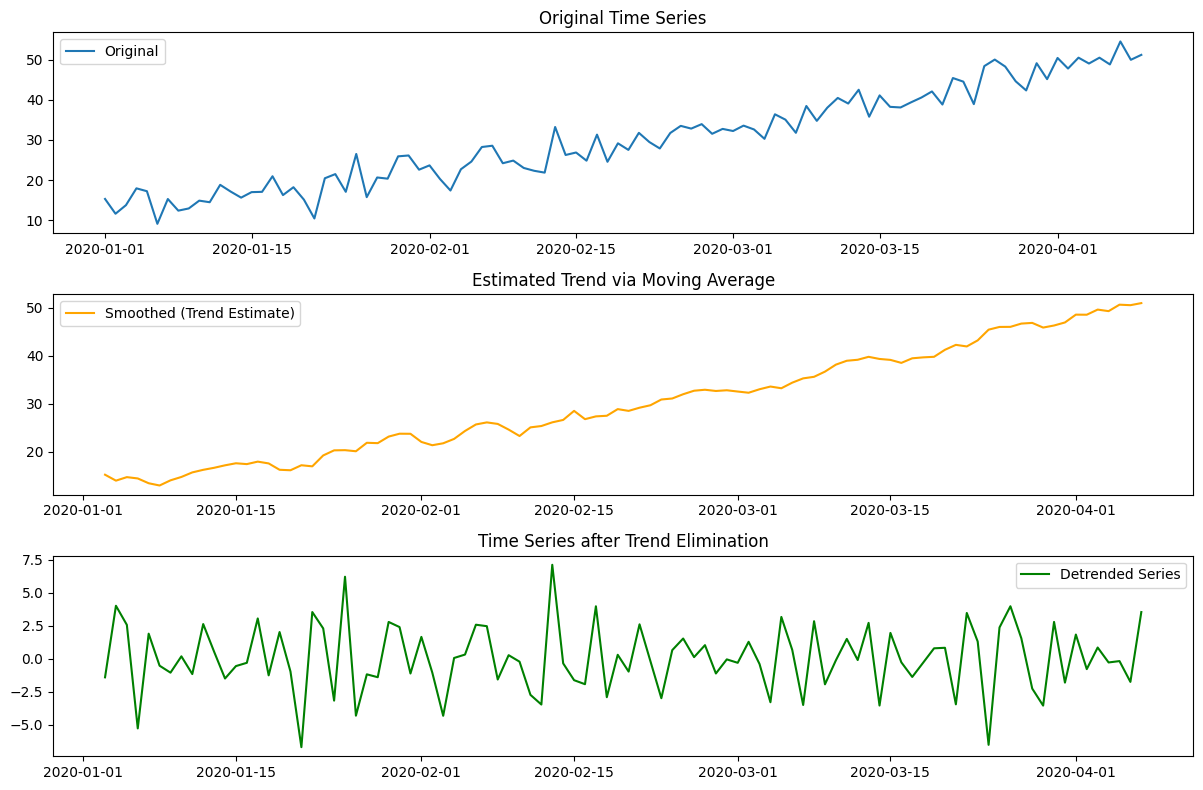

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate synthetic time series data with trend + noise
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')
trend = np.linspace(10, 50, 100)  # linear upward trend
noise = np.random.normal(0, 3, 100)
data = trend + noise

df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

# Step 2: Aggregation (e.g., Weekly mean)
df_agg = df.resample('W').mean()

# Step 3: Smoothing using Moving Average (window=5)
df['Smoothed'] = df['Value'].rolling(window=5, center=True).mean()

# Step 4: Detrending (eliminating trend by subtracting moving average)
df['Detrended'] = df['Value'] - df['Smoothed']

# Step 5: Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Value'], label='Original')
plt.title('Original Time Series')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Smoothed'], color='orange', label='Smoothed (Trend Estimate)')
plt.title('Estimated Trend via Moving Average')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Detrended'], color='green', label='Detrended Series')
plt.title('Time Series after Trend Elimination')
plt.legend()

plt.tight_layout()
plt.show()
